# Working with large data

Python is the domain language of Data science, Data analytics and general programming.

The working horses of these domains are `Numpy`, `Pandas` and `Sklearn`. Those libraries were designed with the focus on small to medium size data projects on a single machine. A prominent example is Pandas, where every execution is done on a single core. 

n the real word data sets are often several GB or even TB.  For this size of data, one often speaks of big data 
For this purpose Pandas is not capable of handeling or even loading the data. 

In addition to Pandas, there are several different libraries for dealing with this issue. These should be discussed in this Notebook. 

A good ( but german) overview article can be found [here](https://www.datarevenue.com/de-blog/pandas-skalieren-ein-vergleich-von-dask-ray-modin-vaex-und-rapids)

## Best practice 

#### <u>Don't use a hammer for all the tasks! Start small!</u>

[The full description can be found here (from DASK but is might be suitable for the others as well)](https://docs.dask.org/en/latest/best-practices.html)

Parallelism brings extra complexity and overhead. Sometimes it’s necessary for larger problems, __but often it’s not.__ Before adding a parallel computing system like Dask to your workload you may want to first try some alternatives:

* __Use better algorithms or data structures:__ NumPy, Pandas, Scikit-Learn may have faster functions for what you’re trying to do. It may be worth consulting with an expert or reading through their docs again to find a better pre-built algorithm.

 * __Better file formats:__ Efficient binary formats that support random access can often help you manage larger-than-memory datasets efficiently and simply. See the [Store Data Efficiently](https://docs.dask.org/en/latest/best-practices.html#store-data-efficiently) section.

* __Compiled code:__ Compiling your Python code with Numba or Cython might make parallelism unnecessary. Or you might use the multi-core parallelism available within those libraries.

* __Sampling:__ Even if you have a lot of data, there might not be much advantage from using all of it. By sampling intelligently you might be able to derive the same insight from a much more manageable subset.

* __Profile:__ If you’re trying to speed up slow code it’s important that you first understand why it is slow. Modest time investments in profiling your code can help you to identify what is slowing you down. This information can help you make better decisions about if parallelism is likely to help, or if other approaches are likely to be more effective.
tice


### Before using different tools, start optimizing your pandas file!

For this purpose here should be shown some smaller tricks, for reducing the data size, increasing the readability of your code and make it more efficient. The whole topic is a rabbit hole by it self and this should just give an overview.

This is done with the inspiration of matt harrisons book `Effective Pandas` which can be found [here](https://hairysun.com/announcing-effective-pandas.html)

And the github repo of matt harrison which can be found [here](https://gist.github.com/mattharrison/ddbd73c13ad0e76ec638311c669bc96b)

## Getting  Data and libraries

In [1]:
%matplotlib inline
from IPython.display import display
import numpy as np
import pandas as pd


In [2]:
pd.options.display.min_rows = 20

`pd.options` might be an interesting tool for expanding or adapting the Dataframes. Here, we've expanded the displayed rows to `20`. More can be found [Here](https://pandas.pydata.org/docs/user_guide/options.html)

Let's import the data from github, which is extracted from [https://www.fueleconomy.gov/feg/download.shtml](https://www.fueleconomy.gov/feg/download.shtml)

In [3]:
autos = pd.read_csv('https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip')

/var/folders/ct/z827xx412hg8j9fj85f2vxfm0000gn/T/ipykernel_34946/2839127697.py:1: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  autos = pd.read_csv('https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip')


In [4]:
autos


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
5,14.982273,0.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
6,13.184400,0.0,0.0,0.0,22,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
7,13.733750,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
8,12.677308,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
9,13.184400,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [5]:
autos.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [6]:
list(autos.columns)

['barrels08',
 'barrelsA08',
 'charge120',
 'charge240',
 'city08',
 'city08U',
 'cityA08',
 'cityA08U',
 'cityCD',
 'cityE',
 'cityUF',
 'co2',
 'co2A',
 'co2TailpipeAGpm',
 'co2TailpipeGpm',
 'comb08',
 'comb08U',
 'combA08',
 'combA08U',
 'combE',
 'combinedCD',
 'combinedUF',
 'cylinders',
 'displ',
 'drive',
 'engId',
 'eng_dscr',
 'feScore',
 'fuelCost08',
 'fuelCostA08',
 'fuelType',
 'fuelType1',
 'ghgScore',
 'ghgScoreA',
 'highway08',
 'highway08U',
 'highwayA08',
 'highwayA08U',
 'highwayCD',
 'highwayE',
 'highwayUF',
 'hlv',
 'hpv',
 'id',
 'lv2',
 'lv4',
 'make',
 'model',
 'mpgData',
 'phevBlended',
 'pv2',
 'pv4',
 'range',
 'rangeCity',
 'rangeCityA',
 'rangeHwy',
 'rangeHwyA',
 'trany',
 'UCity',
 'UCityA',
 'UHighway',
 'UHighwayA',
 'VClass',
 'year',
 'youSaveSpend',
 'guzzler',
 'trans_dscr',
 'tCharger',
 'sCharger',
 'atvType',
 'fuelType2',
 'rangeA',
 'evMotor',
 'mfrCode',
 'c240Dscr',
 'charge240b',
 'c240bDscr',
 'createdOn',
 'modifiedOn',
 'startStop',
 '

In [7]:
autos.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41144 entries, 0 to 41143
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        41144 non-null  float64
 1   barrelsA08       41144 non-null  float64
 2   charge120        41144 non-null  float64
 3   charge240        41144 non-null  float64
 4   city08           41144 non-null  int64  
 5   city08U          41144 non-null  float64
 6   cityA08          41144 non-null  int64  
 7   cityA08U         41144 non-null  float64
 8   cityCD           41144 non-null  float64
 9   cityE            41144 non-null  float64
 10  cityUF           41144 non-null  float64
 11  co2              41144 non-null  int64  
 12  co2A             41144 non-null  int64  
 13  co2TailpipeAGpm  41144 non-null  float64
 14  co2TailpipeGpm   41144 non-null  float64
 15  comb08           41144 non-null  int64  
 16  comb08U          41144 non-null  float64
 17  combA08     

In [8]:
autos.describe().T

,count,mean,std,min,25%,50%,75%,max
barrels08,41144.0,17.283900,4.623232,0.06,14.330870,16.4805,19.388824,47.087143
barrelsA08,41144.0,0.220294,1.140919,0.00,0.000000,0.0000,0.000000,18.311667
charge120,41144.0,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000
charge240,41144.0,0.044872,0.602894,0.00,0.000000,0.0000,0.000000,13.000000
city08,41144.0,18.369045,7.905886,6.00,15.000000,17.0000,20.000000,150.000000
city08U,41144.0,5.978814,11.644783,0.00,0.000000,0.0000,14.055000,150.000000
cityA08,41144.0,0.665808,5.225626,0.00,0.000000,0.0000,0.000000,145.000000
cityA08U,41144.0,0.519901,5.074261,0.00,0.000000,0.0000,0.000000,145.083500
cityCD,41144.0,0.000461,0.038774,0.00,0.000000,0.0000,0.000000,5.350000
cityE,41144.0,0.322713,3.788006,0.00,0.000000,0.0000,0.000000,122.000000


## Datatypes

Let's have a look at the data types, we are given.
Getting the right types will enable analysis and correctness.
To make it more visible, only a few columns are used and displayed below. 
Further, the dates are not parsed, yet, but we will see later about this at [Dates](#dates)

In [9]:
cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 'fuelCost08', 'make', 'model', 'trany', 'range', 'createdOn', 'year']

In [10]:
autos[cols].dtypes

city08          int64
comb08          int64
highway08       int64
cylinders     float64
displ         float64
drive          object
eng_dscr       object
fuelCost08      int64
make           object
model          object
trany          object
range           int64
createdOn      object
year            int64
dtype: object

Let's have a look at the memory usage in bytes!

In [11]:
autos[cols].memory_usage(deep=True)

Index             128
city08         329152
comb08         329152
highway08      329152
cylinders      329152
displ          329152
drive         3028369
eng_dscr      2135693
fuelCost08     329152
make          2606267
model         2813134
trany         2933276
range          329152
createdOn     3497240
year           329152
dtype: int64

In [12]:
autos[cols].memory_usage(deep=True).sum()

19647323

For a better comparison now in MB

In [13]:
autos[cols].memory_usage(deep=True)/1000000

Index         0.000128
city08        0.329152
comb08        0.329152
highway08     0.329152
cylinders     0.329152
displ         0.329152
drive         3.028369
eng_dscr      2.135693
fuelCost08    0.329152
make          2.606267
model         2.813134
trany         2.933276
range         0.329152
createdOn     3.497240
year          0.329152
dtype: float64

In [14]:
autos[cols].memory_usage(deep=True).sum()/1000000

19.647323

So the total size is 19,6 MB. Fairly small, and manageable, but the goal is here to get to know the data structure and possibilities to reduce the size. 

### Integer (Ints)

Let's start with integers (ints) and have a look a the integers by selecting a datatyp and describe. 

In [15]:
autos[cols].select_dtypes(int).describe().T

,count,mean,std,min,25%,50%,75%,max
city08,41144.0,18.369045,7.905886,6.0,15.0,17.0,20.0,150.0
comb08,41144.0,20.616396,7.674535,7.0,17.0,20.0,23.0,136.0
highway08,41144.0,24.504667,7.730364,9.0,20.0,24.0,28.0,124.0
fuelCost08,41144.0,2362.335942,654.981925,500.0,1900.0,2350.0,2700.0,7400.0
range,41144.0,0.793506,13.041592,0.0,0.0,0.0,0.0,370.0
year,41144.0,2001.535266,11.142414,1984.0,1991.0,2002.0,2011.0,2020.0


---

### <u> Excurse:  Chaininng </u>

A good practise in pandas is the chaining method. Instead of writing unbelievable long code, unreadable. 

More can be found [here](https://towardsdatascience.com/using-pandas-method-chaining-to-improve-code-readability-d8517c5626ac, "TDS")

For explaining chaining, let's have a look at the line of code above.

In [16]:
## old fashin
autos[cols].select_dtypes(int).describe().T

,count,mean,std,min,25%,50%,75%,max
city08,41144.0,18.369045,7.905886,6.0,15.0,17.0,20.0,150.0
comb08,41144.0,20.616396,7.674535,7.0,17.0,20.0,23.0,136.0
highway08,41144.0,24.504667,7.730364,9.0,20.0,24.0,28.0,124.0
fuelCost08,41144.0,2362.335942,654.981925,500.0,1900.0,2350.0,2700.0,7400.0
range,41144.0,0.793506,13.041592,0.0,0.0,0.0,0.0,370.0
year,41144.0,2001.535266,11.142414,1984.0,1991.0,2002.0,2011.0,2020.0


And now the Chained version. For more over view, readablity, easier debugging... etc. 

In [17]:
# chaining
(autos
 [cols]
 .select_dtypes(int)
 .describe()
 .T
)

,count,mean,std,min,25%,50%,75%,max
city08,41144.0,18.369045,7.905886,6.0,15.0,17.0,20.0,150.0
comb08,41144.0,20.616396,7.674535,7.0,17.0,20.0,23.0,136.0
highway08,41144.0,24.504667,7.730364,9.0,20.0,24.0,28.0,124.0
fuelCost08,41144.0,2362.335942,654.981925,500.0,1900.0,2350.0,2700.0,7400.0
range,41144.0,0.793506,13.041592,0.0,0.0,0.0,0.0,370.0
year,41144.0,2001.535266,11.142414,1984.0,1991.0,2002.0,2011.0,2020.0


End of excurse
____

Back to the topic of finding out more about the datatypes

In [18]:
(autos[cols]
.select_dtypes(int)
.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41144 entries, 0 to 41143
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   city08      41144 non-null  int64
 1   comb08      41144 non-null  int64
 2   highway08   41144 non-null  int64
 3   fuelCost08  41144 non-null  int64
 4   range       41144 non-null  int64
 5   year        41144 non-null  int64
dtypes: int64(6)
memory usage: 1.9 MB


So we see, that all columns have a dtype of int64. Which means it is an Nullable integer data type and 64 bits are reserved for the interger, if it is used or not.So a lot of 0 values are stored, without usage.  [deeper dive](https://pbpython.com/pandas_dtypes.html)

In [19]:
# can `comb08` be and int8?
np.iinfo(np.int8)

iinfo(min=-128, max=127, dtype=int8)

For getting an insight in the dtypes `np.info(x)` x= dtype is a good start. 

[np.info()doc](https://numpy.org/doc/stable/reference/generated/numpy.iinfo.html)

Here we see, that the int8 has 127 number available, which might be suitable for `highway08`, but for the others not. And even for `highway08`it is very narrow. Let's have a look for int16

In [20]:
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

so with 32767 everything is covered, even the biggest `fuelCost08` = 7400. So lets transfrome this datatype by chaining.

In [21]:

# chaining
(autos #address the dataframe
 [cols] # adress te columns
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16' }) # set data type in a dictionary
 .select_dtypes([int, 'int16']) # have a look at the dtypes 
 .describe()
 .T
)


,count,mean,std,min,25%,50%,75%,max
city08,41144.0,18.369045,7.905886,6.0,15.0,17.0,20.0,150.0
comb08,41144.0,20.616396,7.674535,7.0,17.0,20.0,23.0,136.0
fuelCost08,41144.0,2362.335942,654.981925,500.0,1900.0,2350.0,2700.0,7400.0
range,41144.0,0.793506,13.041592,0.0,0.0,0.0,0.0,370.0
year,41144.0,2001.535266,11.142414,1984.0,1991.0,2002.0,2011.0,2020.0


In [22]:

# chaining
# use 'integer' so see all int-like columns
(autos
 [cols]
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16', 
          'range': 'int16', 'year': 'int16'})
 .select_dtypes([int, 'int16'])  # see https://numpy.org/doc/stable/reference/arrays.scalars.html
 .describe()
)



,city08,comb08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,654.981925,13.041592,11.142414
min,6.000000,7.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,7400.000000,370.000000,2020.000000


In [23]:
(autos
 [cols]
.astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16', 
          'range': 'int16', 'year': 'int16'})
 .select_dtypes(['integer'])
 .info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41144 entries, 0 to 41143
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   city08      41144 non-null  int16
 1   comb08      41144 non-null  int16
 2   highway08   41144 non-null  int8 
 3   fuelCost08  41144 non-null  int16
 4   range       41144 non-null  int16
 5   year        41144 non-null  int16
dtypes: int16(5), int8(1)
memory usage: 442.1 KB


A deeper read  abour scalars can be found here => [arrays.scalars](https://numpy.org/doc/stable/reference/arrays.scalars.html)

Let's have a look at the change n storage size.  Remember, we are starting slow :) 

In [24]:
# chaining
(autos
 [cols]
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16', 
          'range': 'int16', 'year': 'int16'})
 .memory_usage(deep=True)
 .sum()/1000000  # was 19,647,323
)

18.124995

## Floats

Let's have a look at the floats... It is important to mention, that if a column contains NaN's and int, the overall dtype is change to float. 

In [25]:
(autos
[cols]
.select_dtypes('float')
.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41144 entries, 0 to 41143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cylinders  40938 non-null  float64
 1   displ      40940 non-null  float64
dtypes: float64(2)
memory usage: 643.0 KB


In [26]:
(autos
[cols]
.select_dtypes('float')
.describe()
.T)

,count,mean,std,min,25%,50%,75%,max
cylinders,40938.0,5.717084,1.755517,2.0,4.0,6.0,6.0,16.0
displ,40940.0,3.294238,1.357151,0.0,2.2,3.0,4.3,8.4


This behavior gets obvious, if one is observing the cylinders. (ever heard of an car with 0.5 cylinders ? )

In [27]:
# surprise! cylinders looks int-like
autos.cylinders.describe()

count    40938.000000
mean         5.717084
std          1.755517
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: cylinders, dtype: float64

In [28]:
(autos
[cols]
.select_dtypes('float')
.nunique())

cylinders     9
displ        66
dtype: int64

In [29]:
(autos
['cylinders']
.unique())

array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., nan, 16.])

In [30]:
(autos
['displ']
.unique())

array([2. , 4.9, 2.2, 5.2, 1.8, 1.6, 2.3, 2.8, 4. , 5. , 3.3, 3.1, 3.8,
       4.6, 3.4, 3. , 5.9, 2.5, 4.5, 6.8, 2.4, 2.9, 5.7, 4.3, 3.5, 5.8,
       3.2, 4.2, 1.9, 6.2, 2.6, 7.4, 3.9, 1.5, 1.3, 4.1, 8. , 6. , 3.6,
       5.4, 5.6, 1. , 2.1, 1.2, 6.5, 2.7, 4.7, 5.5, 1.1, 5.3, 1.7, 4.4,
       3.7, 6.7, 4.8, nan, 8.3, 1.4, 6.1, 7. , 8.4, 6.3, 6.6, 6.4, 0.6,
       0. , 0.9])

As mentioned, there might be some missing values. To find this, `value_counts` and keep the NaN in by `dropna=False`. 

In [31]:
# opps! missing values
autos.cylinders.value_counts(dropna=False)

4.0     15938
6.0     14284
8.0      8801
5.0       771
12.0      626
3.0       279
NaN       206
10.0      170
2.0        59
16.0       10
Name: cylinders, dtype: int64

Where are the missing values ?

In [32]:
# where are they missing?
(autos
  [cols]
  .query('cylinders.isna()')
)

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
7138,81,85,91,NaN,NaN,NaN,NaN,800,Nissan,Altra EV,NaN,90,Tue Jan 01 00:00:00 EST 2013,2000
7139,81,72,64,NaN,NaN,2-Wheel Drive,NaN,900,Toyota,RAV4 EV,NaN,88,Tue Jan 01 00:00:00 EST 2013,2000
8143,81,72,64,NaN,NaN,2-Wheel Drive,NaN,900,Toyota,RAV4 EV,NaN,88,Tue Jan 01 00:00:00 EST 2013,2001
8144,74,65,58,NaN,NaN,NaN,NaN,1000,Ford,Th!nk,NaN,29,Tue Jan 01 00:00:00 EST 2013,2001
8146,45,39,33,NaN,NaN,2-Wheel Drive,NaN,1700,Ford,Explorer USPS Electric,NaN,38,Tue Jan 01 00:00:00 EST 2013,2001
8147,84,75,66,NaN,NaN,NaN,NaN,900,Nissan,Hyper-Mini,NaN,33,Tue Jan 01 00:00:00 EST 2013,2001
9212,87,78,69,NaN,NaN,2-Wheel Drive,NaN,850,Toyota,RAV4 EV,NaN,95,Tue Jan 01 00:00:00 EST 2013,2002
9213,45,39,33,NaN,NaN,2-Wheel Drive,NaN,1700,Ford,Explorer USPS Electric,NaN,38,Tue Jan 01 00:00:00 EST 2013,2002
10329,87,78,69,NaN,NaN,2-Wheel Drive,NaN,850,Toyota,RAV4 EV,NaN,95,Tue Jan 01 00:00:00 EST 2013,2003
21413,22,24,28,NaN,NaN,4-Wheel Drive,NaN,1750,Subaru,RX Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985


It seams, that mostly electric cares a showing NaN values. So let's fill them in a first instance with `0`but keep in mind, that there might be several cars, with cylinders, where the amount is unknown. 

i.e. 21413, Subaru, 	RX Turbo, 1985,

In [33]:
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0)) # rewrites the cylinders and displ column
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 
          'fuelCost08': 'int16', 'range': 'int16', 'year': 'int16',  })
 .describe()
 .T
)

,count,mean,std,min,25%,50%,75%,max
city08,41144.0,18.369045,7.905886,6.0,15.0,17.0,20.0,150.0
comb08,41144.0,20.616396,7.674535,7.0,17.0,20.0,23.0,136.0
highway08,41144.0,24.504667,7.730364,9.0,20.0,24.0,28.0,124.0
cylinders,41144.0,5.688460,1.797009,0.0,4.0,6.0,6.0,16.0
displ,41144.0,3.277904,1.373415,0.0,2.2,3.0,4.3,8.4
fuelCost08,41144.0,2362.335942,654.981925,500.0,1900.0,2350.0,2700.0,7400.0
range,41144.0,0.793506,13.041592,0.0,0.0,0.0,0.0,370.0
year,41144.0,2001.535266,11.142414,1984.0,1991.0,2002.0,2011.0,2020.0


The `.assign`function returns a new object with all original columns in addition to new ones. Existing columns that are re-assigned will be overwritten.

[assign doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html)

So let's have a deeper look at the datatypes. 

In [34]:
(autos
[cols]
.describe()
.T)

,count,mean,std,min,25%,50%,75%,max
city08,41144.0,18.369045,7.905886,6.0,15.0,17.0,20.0,150.0
comb08,41144.0,20.616396,7.674535,7.0,17.0,20.0,23.0,136.0
highway08,41144.0,24.504667,7.730364,9.0,20.0,24.0,28.0,124.0
cylinders,40938.0,5.717084,1.755517,2.0,4.0,6.0,6.0,16.0
displ,40940.0,3.294238,1.357151,0.0,2.2,3.0,4.3,8.4
fuelCost08,41144.0,2362.335942,654.981925,500.0,1900.0,2350.0,2700.0,7400.0
range,41144.0,0.793506,13.041592,0.0,0.0,0.0,0.0,370.0
year,41144.0,2001.535266,11.142414,1984.0,1991.0,2002.0,2011.0,2020.0


In [35]:
# use this to inspect float sizes
np.finfo(np.float16)


finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

`.finfo` Machine limits for floating point types. [.finfo doc](https://numpy.org/doc/stable/reference/generated/numpy.finfo.html)

In [36]:
# chaining - convert displ to float16
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'))
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16', 
          'range': 'int16',  'year': 'int16'})
)

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
0,19,21,25,4,2.000000,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
1,9,11,14,12,4.898438,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
2,23,27,33,4,2.199219,Front-Wheel Drive,(FFS),1550,Dodge,Charger,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
3,10,11,12,8,5.199219,Rear-Wheel Drive,NaN,3850,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
5,21,22,24,4,1.799805,Front-Wheel Drive,(FFS),1900,Subaru,Loyale,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
6,22,25,29,4,1.799805,Front-Wheel Drive,(FFS),1700,Subaru,Loyale,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
7,23,24,26,4,1.599609,Front-Wheel Drive,(FFS),1750,Toyota,Corolla,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
8,23,26,31,4,1.599609,Front-Wheel Drive,(FFS),1600,Toyota,Corolla,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
9,23,25,30,4,1.799805,Front-Wheel Drive,(FFS),1700,Toyota,Corolla,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1993


Now apply the change in typs to int (where it is possible), fill the nan with 0 astype and use the assign function. 

Assign-Function: 
Returns a new object with all original columns in addition to new ones. Existing columns that are re-assigned will be overwritten.

[Assign function doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html)

In [37]:
# new memory usage
(autos
#[cols] alternative
 .loc[:, cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'))
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16', 
          'range': 'int16',  'year': 'int16'})
 .memory_usage(deep=True)
 .sum()/1000000  # was 19,647,323
)

17.590123

Yeah another 10 percent less data

## Objects

Let's have a look at the objects.

 Objects are often Strings or mixed dtypes. And strings are very hungry for data.
 A solution might be to transform repetetive strings into categorigal data.  [catagorical docu](https://pandas.pydata.org/docs/user_guide/categorical.html)

 So let's have a look at the object data, we have.

In [38]:
(autos
 [cols]
 .select_dtypes(object)
)

,drive,eng_dscr,make,model,trany,createdOn
0,Rear-Wheel Drive,(FFS),Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
1,Rear-Wheel Drive,(GUZZLER),Ferrari,Testarossa,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
2,Front-Wheel Drive,(FFS),Dodge,Charger,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
3,Rear-Wheel Drive,NaN,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
4,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",Subaru,Legacy AWD Turbo,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
5,Front-Wheel Drive,(FFS),Subaru,Loyale,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
6,Front-Wheel Drive,(FFS),Subaru,Loyale,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
7,Front-Wheel Drive,(FFS),Toyota,Corolla,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
8,Front-Wheel Drive,(FFS),Toyota,Corolla,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
9,Front-Wheel Drive,(FFS),Toyota,Corolla,Automatic 4-spd,Tue Jan 01 00:00:00 EST 2013


So 'make'  and 'drive'  might be suitable for categorical because unique values or the cardinality is low. 

And check 'drive` for the posibility of categorical data. 

In [39]:
# looks categorical
(autos
.drive
.value_counts
(dropna=False))

Front-Wheel Drive             14236
Rear-Wheel Drive              13831
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                3015
4-Wheel Drive                  1460
NaN                            1189
2-Wheel Drive                   507
Part-time 4-Wheel Drive         258
Name: drive, dtype: int64

8  unique values are in the column drive + NaN !

Let's check for mssing data

In [40]:
# where are the values missing for drive?
(autos
 [cols]
 .query('drive.isna()'))

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
7138,81,85,91,NaN,NaN,NaN,NaN,800,Nissan,Altra EV,NaN,90,Tue Jan 01 00:00:00 EST 2013,2000
8144,74,65,58,NaN,NaN,NaN,NaN,1000,Ford,Th!nk,NaN,29,Tue Jan 01 00:00:00 EST 2013,2001
8147,84,75,66,NaN,NaN,NaN,NaN,900,Nissan,Hyper-Mini,NaN,33,Tue Jan 01 00:00:00 EST 2013,2001
18217,18,21,25,4.0,2.0,NaN,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18218,20,22,26,4.0,1.5,NaN,(FFS),1900,Bertone,X1/9,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18219,13,15,20,8.0,5.7,NaN,(350 V8) (FFS),2800,Chevrolet,Corvette,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18220,13,15,20,8.0,5.7,NaN,(350 V8) (FFS),2800,Chevrolet,Corvette,Manual 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18221,15,17,20,6.0,3.0,NaN,"(FFS,TRBO)",2500,Nissan,300ZX,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18222,16,18,20,6.0,3.0,NaN,(FFS),2350,Nissan,300ZX,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18223,16,18,22,6.0,3.0,NaN,"(FFS,TRBO)",2350,Nissan,300ZX,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1984


Electric cars and from 1984 have missing drives.  So maybe in 1984 they might not have the column drive. 

In [41]:
(autos
[cols]
.groupby("year")
.drive
.nunique())

year
1984    3
1985    4
1986    4
1987    3
1988    3
1989    3
1990    3
1991    3
1992    3
1993    3
1994    3
1995    4
1996    3
1997    4
1998    4
1999    4
2000    4
2001    4
2002    4
2003    4
2004    4
2005    4
2006    4
2007    4
2008    3
2009    4
2010    6
2011    5
2012    5
2013    5
2014    5
2015    5
2016    5
2017    5
2018    5
2019    5
2020    5
Name: drive, dtype: int64

So we have data for drives in 1984 but not well managed

In [42]:
# drive and make (in .astype) to category
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'),
         drive=autos.drive.fillna('Other').astype('category')
        )
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16', 
          'range': 'int16',  'year': 'int16', 'make': 'category'})
 .memory_usage(deep=True)
 .sum()/1000000  # was 19,647,323
)

12.093275

Now we've saved 30% of data and the speed might also be increased. 

BUT WAIT; there is more : 


Now let's inspect `trany`

In [43]:
(autos.
trany.
value_counts(dropna=False))

Automatic 4-spd                     11047
Manual 5-spd                         8361
Automatic 3-spd                      3151
Automatic (S6)                       3106
Manual 6-spd                         2757
Automatic 5-spd                      2203
Automatic (S8)                       1665
Automatic 6-spd                      1619
Manual 4-spd                         1483
Automatic (S5)                        833
Automatic (variable gear ratios)      826
Automatic 7-spd                       724
Automatic 8-spd                       433
Automatic (AM-S7)                     424
Automatic (S7)                        327
Automatic 9-spd                       293
Automatic (AM7)                       245
Automatic (S4)                        233
Automatic (AV-S6)                     208
Automatic (A1)                        201
Automatic (AM6)                       151
Automatic (AV-S7)                     139
Automatic (S10)                       124
Automatic (AM-S6)                 

There are 2 pieces of data. One automatic/Manual, second n-speed.  is placed. str.extract(r'(\d)+').fillna('20').astype('int8' Extracts the number of gears and if it is an automatic it is set as fillna to 20 (arbitrarily!). In the last line the transmission column (trany) is deleted

In [44]:
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'),
         drive=autos.drive.fillna('Other').astype('category'),
         automatic=autos.trany.str.contains('Auto'), # setting an "parser" with Auto
         speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8') # here nspeed extracted as string and  `20`set for fillna` 
        )
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16', 
          'range': 'int16',  'year': 'int16', 'make': 'category'})
 .drop(columns=['trany']) # drop the transmission, because it is no longer needed
 .memory_usage(deep=True)
 .sum()/1000000  # was 19,647,323
)

10.631047

Now we reduced the size of the data by around 50% 

## Dates

Since we didn't parse the date, we've implemented it here by [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) we have to do it manually

[dt.tz_localize](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html)Localize tz-naive index of a Series or DataFrame to target time zone.

In [45]:
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'),
         drive=autos.drive.fillna('Other').astype('category'),
         automatic=autos.trany.str.contains('Auto'),
         speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
         createdOn=pd.to_datetime(autos.createdOn).dt.tz_localize('America/New_York')
        )
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16', 
          'range': 'int16',  'year': 'int16', 'make': 'category'})
 .drop(columns=['trany'])
 .memory_usage(deep=True)
 .sum()/1000000  # was 19,647,323
)


/Users/kaergell/Desktop/Neue Fische/followup/.followup/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/kaergell/Desktop/Neue Fische/followup/.followup/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


7.462959

But pandas don't like the EST time line ... as you can see in te next line.

In [46]:
# Python doesn't like EST/EDT
autos[cols].createdOn

0        Tue Jan 01 00:00:00 EST 2013
1        Tue Jan 01 00:00:00 EST 2013
2        Tue Jan 01 00:00:00 EST 2013
3        Tue Jan 01 00:00:00 EST 2013
4        Tue Jan 01 00:00:00 EST 2013
5        Tue Jan 01 00:00:00 EST 2013
6        Tue Jan 01 00:00:00 EST 2013
7        Tue Jan 01 00:00:00 EST 2013
8        Tue Jan 01 00:00:00 EST 2013
9        Tue Jan 01 00:00:00 EST 2013
                     ...             
41134    Tue Jan 01 00:00:00 EST 2013
41135    Tue Jan 01 00:00:00 EST 2013
41136    Tue Jan 01 00:00:00 EST 2013
41137    Tue Jan 01 00:00:00 EST 2013
41138    Tue Jan 01 00:00:00 EST 2013
41139    Tue Jan 01 00:00:00 EST 2013
41140    Tue Jan 01 00:00:00 EST 2013
41141    Tue Jan 01 00:00:00 EST 2013
41142    Tue Jan 01 00:00:00 EST 2013
41143    Tue Jan 01 00:00:00 EST 2013
Name: createdOn, Length: 41144, dtype: object

For this purpose we make pandas happy with replacing EDT -> -04:00 and EST -> -05:00)

`replace({' EDT': '-04:00',
                ' EST': '-05:00'}, regex=True), utc=True)`

is set

In [47]:
# Fix date warnings
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'),
         drive=autos.drive.fillna('Other').astype('category'),
         automatic=autos.trany.str.contains('Auto'),
         speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
         createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00',
                ' EST': '-05:00'}, regex=True), utc=True).dt.tz_convert('America/New_York')
        )
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16', 
          'range': 'int16',  'year': 'int16', 'make': 'category'})
 .drop(columns=['trany'])
 .memory_usage(deep=True)
 .sum()/1000000  # was 19,647,323
)

7.462959

Now, we've lost another 3 MB, getting slim, eh  remeber, we've started with  19,6 MB!

Let's deal with the engin description

In [48]:

# move on to eng_dscr
#  http://www.fueleconomy.gov/feg/findacarhelp.shtml#trany
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'),
         drive=autos.drive.fillna('Other').astype('category'),
         automatic=autos.trany.str.contains('Auto'),
         speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
         createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00',
                ' EST': '-05:00'}, regex=True), utc=True).dt.tz_convert('America/New_York')
        )
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16', 
          'range': 'int16',  'year': 'int16', 'make': 'category'})
 .drop(columns=['trany'])
 .eng_dscr
 .value_counts(dropna=False)
)

NaN                                 16153
(FFS)                                8827
SIDI                                 5526
(FFS) CA model                        926
(FFS)      (MPFI)                     734
FFV                                   701
(FFS,TRBO)                            666
(350 V8) (FFS)                        411
(GUZZLER)  (FFS)                      366
SOHC                                  354
                                    ...  
B234L/R4 (FFS,TRBO)                     1
GUZZLER V8 FFS,TURBO                    1
4.6M FFS MPFI                           1
CNG FFS                                 1
POLICE FFS MPFI                         1
B308E5 FFS,TURBO                        1
5.4E-R FFS MPFI                         1
V-6 FFS                                 1
(GUZZLER)  (FFS)      (S-CHARGE)        1
R-ENG (FFS,TRBO)                        1
Name: eng_dscr, Length: 558, dtype: int64

16k are missing. 
but FFS seems to be important. 
Also a lot of columns have just a lot of spaces. 

So to deal with that the FFS column is set to an indicator column.  By adding [str.contains](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html)

In [49]:
# add ffs (Feedback fuel system), drop eng_descr
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
         displ=autos.displ.fillna(0).astype('float16'),
         drive=autos.drive.fillna('Other').astype('category'),
         automatic=autos.trany.str.contains('Auto'),
         speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
         createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00',
                ' EST': '-05:00'}, regex=True), utc=True).dt.tz_convert('America/New_York'),
         ffs=autos.eng_dscr.str.contains('FFS')
        )
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16', 
          'range': 'int16', 'year': 'int16', 'make': 'category'})
 .drop(columns=['trany', 'eng_dscr'])
 .memory_usage(deep=True)
 .sum()/1000000  # was 19,647,323
)

6.701302

Work with the original dataset. And with the chaining you can read it like a recipy. 

And now clean the notebook by writing a function and applying the function right after the data import. So you can fairly quickly explain what you have done and everyone is happy.

In [50]:
# a glorious function
def clean_autos(autos):
    """
    This function does everything the notebook does
    """
    cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 
        'fuelCost08', 'make', 'model', 'trany', 'range', 'createdOn', 'year']
    return (autos
     [cols]
     .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
             displ=autos.displ.fillna(0).astype('float16'),
             drive=autos.drive.fillna('Other').astype('category'),
             automatic=autos.trany.str.contains('Auto'),
             speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
             createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00',
                ' EST': '-05:00'}, regex=True), utc=True).dt.tz_convert('America/New_York'),
             ffs=autos.eng_dscr.str.contains('FFS')
            )
     .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16',
              'range': 'int16',  'year': 'int16', 'make': 'category'})
     .drop(columns=['trany', 'eng_dscr'])
    )

clean_autos(autos)


,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.000000,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.898438,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False
2,23,27,33,4,2.199219,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5,True
3,10,11,12,8,5.199219,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3,NaN
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5,True
5,21,22,24,4,1.799805,Front-Wheel Drive,1900,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,True,3,True
6,22,25,29,4,1.799805,Front-Wheel Drive,1700,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,False,5,True
7,23,24,26,4,1.599609,Front-Wheel Drive,1750,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,3,True
8,23,26,31,4,1.599609,Front-Wheel Drive,1600,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,False,5,True
9,23,25,30,4,1.799805,Front-Wheel Drive,1700,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,4,True


### Chain

Chaining is also called "flow" programming. Rather than making intermediate variables, just leverage the fact that most operations return a new object and work on that.

The chain should read like a recipe of ordered steps.

(BTW, this is actually what we did above.)


Hint: Leverage .pipe if you can't find a way to chain 😉🐼💪 

In [51]:

def clean_autos(autos):
    cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 
        'fuelCost08', 'make', 'model', 'trany', 'range', 'createdOn', 'year']
    return (autos
     [cols]
     .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
             displ=autos.displ.fillna(0).astype('float16'),
             drive=autos.drive.fillna('Other').astype('category'),
             automatic=autos.trany.str.contains('Auto'),
             speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
             createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00',
                ' EST': '-05:00'}, regex=True), utc=True).dt.tz_convert('America/New_York'),
             ffs=autos.eng_dscr.str.contains('FFS')
            )
     .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16', 
              'range': 'int16',  'year': 'int16', 'make': 'category'})
     .drop(columns=['trany', 'eng_dscr'])
    )

cleanauto=clean_autos(autos)



By using `cleanauto`you are appplying the function `clean_autos(autos)`

In [52]:
cleanauto.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41144 entries, 0 to 41143
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype                           
---  ------      --------------  -----                           
 0   city08      41144 non-null  int16                           
 1   comb08      41144 non-null  int16                           
 2   highway08   41144 non-null  int8                            
 3   cylinders   41144 non-null  int8                            
 4   displ       41144 non-null  float16                         
 5   drive       41144 non-null  category                        
 6   fuelCost08  41144 non-null  int16                           
 7   make        41144 non-null  category                        
 8   model       41144 non-null  object                          
 9   range       41144 non-null  int16                           
 10  createdOn   41144 non-null  datetime64[ns, America/New_York]
 11  year        41144 non-null  

In comparisson the "normal" unchained way. Have fun reading and finding the error

In [53]:
# compare chain to this mess
a1 = autos[cols]
cyls = autos.cylinders.fillna(0)
cyls2 = cyls.astype('int8')
a1['cylinders'] = cyls2
displ = a1.displ
displ2 = displ.fillna(0)
displ3 = displ2.astype('float16')
a1.displ = displ3
a1.drive = autos.drive.fillna('Other').astype('category')
a1['automatic'] = autos.trany.str.contains('Auto')           
speed = autos.trany.str.extract(r'(\d)+')
speedfill = speed.fillna('20')
speedint = speedfill.astype('int8')
a1['speeds'] = speedint
a1.createdOn=pd.to_datetime(autos.createdOn).dt.tz_localize('America/New_York')
a1.ffs=autos.eng_dscr.str.contains('FFS')
a1['highway08'] = autos.highway08.astype('int8')
a1['city08'] = autos.city08.astype('int8')
a1['comb08'] = autos.comb08.astype('int16')
a1['fuelCost08'] = autos.fuelCost08.astype('int16')
a1['range'] = autos.range.astype('int16')
a1['make'] = autos.make.astype('category')
a3 = a1.drop(columns=['trany', 'eng_dscr'])

/var/folders/ct/z827xx412hg8j9fj85f2vxfm0000gn/T/ipykernel_34946/3462600296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['cylinders'] = cyls2
/var/folders/ct/z827xx412hg8j9fj85f2vxfm0000gn/T/ipykernel_34946/3462600296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1.displ = displ3
/var/folders/ct/z827xx412hg8j9fj85f2vxfm0000gn/T/ipykernel_34946/3462600296.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

Aside from beeing kind of hard to read, it also stores more global variables, and with that more garbage. In the chain function these are collected, so less garbage, less golbal varients etc. 

Check intermediate states with pipe function [pipe function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pipe.html)

* Apply chainable functions that expect Series or DataFrames.

In [54]:
# easy to debug
#  - assign to var (df3)
#  - comment out
#  - pipe to display


from IPython.display import display

def get_var(df, var_name):
    globals()[var_name] = df
    return df

def clean_autos(autos):
    return (autos
     [cols]
      # create var                        
     .pipe(get_var, 'df3')
     .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
             displ=autos.displ.fillna(0).astype('float16'),
             drive=autos.drive.fillna('Other').astype('category'),
             automatic=autos.trany.str.contains('Auto'),
             speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),        
             createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00',
                ' EST': '-05:00'}, regex=True), utc=True).dt.tz_convert('America/New_York'),
             ffs=autos.eng_dscr.str.contains('FFS')
            )
     # debug pipe            
     .pipe(lambda df: display(df) or df)
     .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16', 
              'range': 'int16', 'year': 'int16', 'make': 'category'})
     .drop(columns=['trany', 'eng_dscr'])
    )

clean_autos(autos)

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.000000,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.898438,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5,False
2,23,27,33,4,2.199219,Front-Wheel Drive,(FFS),1550,Dodge,Charger,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5,True
3,10,11,12,8,5.199219,Rear-Wheel Drive,NaN,3850,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1985,True,3,NaN
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5,True
5,21,22,24,4,1.799805,Front-Wheel Drive,(FFS),1900,Subaru,Loyale,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1993,True,3,True
6,22,25,29,4,1.799805,Front-Wheel Drive,(FFS),1700,Subaru,Loyale,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5,True
7,23,24,26,4,1.599609,Front-Wheel Drive,(FFS),1750,Toyota,Corolla,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1993,True,3,True
8,23,26,31,4,1.599609,Front-Wheel Drive,(FFS),1600,Toyota,Corolla,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5,True
9,23,25,30,4,1.799805,Front-Wheel Drive,(FFS),1700,Toyota,Corolla,Automatic 4-spd,0,2013-01-01 00:00:00-05:00,1993,True,4,True


,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.000000,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.898438,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False
2,23,27,33,4,2.199219,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5,True
3,10,11,12,8,5.199219,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3,NaN
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5,True
5,21,22,24,4,1.799805,Front-Wheel Drive,1900,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,True,3,True
6,22,25,29,4,1.799805,Front-Wheel Drive,1700,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,False,5,True
7,23,24,26,4,1.599609,Front-Wheel Drive,1750,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,3,True
8,23,26,31,4,1.599609,Front-Wheel Drive,1600,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,False,5,True
9,23,25,30,4,1.799805,Front-Wheel Drive,1700,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,4,True


To have a look at the intermedeate dataframe by just adding df3

In [55]:
df3

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
0,19,21,25,4.0,2.0,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
1,9,11,14,12.0,4.9,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
2,23,27,33,4.0,2.2,Front-Wheel Drive,(FFS),1550,Dodge,Charger,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
3,10,11,12,8.0,5.2,Rear-Wheel Drive,NaN,3850,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
4,17,19,23,4.0,2.2,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
5,21,22,24,4.0,1.8,Front-Wheel Drive,(FFS),1900,Subaru,Loyale,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
6,22,25,29,4.0,1.8,Front-Wheel Drive,(FFS),1700,Subaru,Loyale,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
7,23,24,26,4.0,1.6,Front-Wheel Drive,(FFS),1750,Toyota,Corolla,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
8,23,26,31,4.0,1.6,Front-Wheel Drive,(FFS),1600,Toyota,Corolla,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
9,23,25,30,4.0,1.8,Front-Wheel Drive,(FFS),1700,Toyota,Corolla,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1993



### Don't Mutate

`you are missing the point, inplace rarely actually does something inplace, you are thinking that you are saving memory but you are not.`
  

  [jreback - Pandas core dev](https://github.com/pandas-dev/pandas/issues/16529#issuecomment-676518136)

 * In general, no performance benefits
 * Prohibits chaining
 * SettingWithCopyWarning fun


Inplace is a dirty line  :D 
With chaining you don't need to have inplace =True 

```
 .pipe(lambda df: display(df) or df)
 .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16', 'range': 'int16', 'year': 'int16', 'make':'category'})
.drop(columns=['trany', 'eng_dscr'])
```
For the drop, there is NO inplace=True


### Don't Apply (if you can)


Prepare your data with the function above

In [56]:
def clean_autos(autos):
    return (autos
     [cols]
     .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
             displ=autos.displ.fillna(0).astype('float16'),
             drive=autos.drive.fillna('Other').astype('category'),
             automatic=autos.trany.str.contains('Auto'),
             speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
             createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00',
                ' EST': '-05:00'}, regex=True), utc=True).dt.tz_convert('America/New_York'),
             ffs=autos.eng_dscr.str.contains('FFS')
            )
     .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08': 'int16',
              'range': 'int16',  'year': 'int16', 'make': 'category'})
     .drop(columns=['trany', 'eng_dscr'])
    )


autos2 = clean_autos(autos)


Write a function for calculating the liter/100km with the following function.

235.215 is the transfer value for miles/galone => liters/100km

In [57]:
# try to me more Euro-centric
def to_lper100km(val):
    return 235.215 / val
autos2.city08.apply(to_lper100km)

0        12.379737
1        26.135000
2        10.226739
3        23.521500
4        13.836176
5        11.200714
6        10.691591
7        10.226739
8        10.226739
9        10.226739
           ...    
41134    13.067500
41135    10.226739
41136    11.200714
41137     9.800625
41138    11.200714
41139    12.379737
41140    11.760750
41141    13.067500
41142    13.067500
41143    14.700938
Name: city08, Length: 41144, dtype: float64

No apply the function to the dataset

In [58]:
# this gives the sames results
235.215 / autos2.city08 

0        12.379737
1        26.135000
2        10.226739
3        23.521500
4        13.836176
5        11.200714
6        10.691591
7        10.226739
8        10.226739
9        10.226739
           ...    
41134    13.067500
41135    10.226739
41136    11.200714
41137     9.800625
41138    11.200714
41139    12.379737
41140    11.760750
41141    13.067500
41142    13.067500
41143    14.700938
Name: city08, Length: 41144, dtype: float64

Now timeit with the magic function of jupyter

In [59]:
%%timeit
autos2.city08.apply(to_lper100km)

10.9 ms ± 398 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [60]:
%%timeit
235.215 / autos2.city08 


265 µs ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


So `.apply` is way slower than just adding the `nonapply function`

Strings not only using more data, they are also slower calculated!

In [61]:
# ~40x slower!
8_81  / 192


4.588541666666667

Another function

In [62]:
def is_american(val):
    return val in {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}

In [63]:
%%timeit
autos2.make.apply(is_american)


1.77 ms ± 372 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
%%timeit
autos2.make.isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'})


924 µs ± 43 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


The `isin function` checks Whether each element in the DataFrame is contained in values.

[isin docu](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)

Transfering the code to str makes it horribly slow, because this is not an optimized pandas object, but a python object

In [65]:
%%timeit
#convert to string
autos2.make.astype(str).isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'})


15.6 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%%timeit
autos2.make.astype(str).apply(is_american)


23.7 ms ± 3.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Write a function for the country (Chevrolet', 'Ford', 'Dodge', 'GMC', "Tesla") = "US"; rest = others

In [67]:
def country(val):
    if val in {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}:
        return 'US'
    return 'Other'



In [68]:

%%timeit
# Might be ok for strings, since they are not vectorized...
(autos2
 .assign(country=autos2.make.apply(country))
)


2.68 ms ± 90.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Let's see how to do so with the `where methode`.  `.where`Replace values where the condition is False.
[where doc]("https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html?highlight=where#pandas.DataFrame.where")

In [69]:

%%timeit
values = {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}
(autos2
 .assign(country='US')
 .assign(country=lambda df_:df_.country.where(df_.make.isin(values), 'Other'))
)



8.56 ms ± 746 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


And the same for numpy [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [70]:
%%timeit

(autos2
 .assign(country=np.where(autos2.make.isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}), 
                          'US', 'Other'))
)


8.43 ms ± 542 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The numpy select method.
 Returns an array drawn from elements in choicelist, depending on conditions.
 [np.select](https://numpy.org/doc/stable/reference/generated/numpy.select.html?highlight=select#numpy.select)

In [71]:
%%timeit

(autos2
 .assign(country=np.select([autos2.make.isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'})], 
                           ['US'], 'Other'))
)


8.49 ms ± 314 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Master Aggregation 

Let's compare mileage by country by year...🤔

In [72]:
(autos2
   .groupby('year')
   .mean()
   .reset_index()
)

,year,city08,comb08,highway08,cylinders,displ,fuelCost08,range,speeds
0,1984,17.982688,19.881874,23.075356,5.385438,3.164062,2313.543788,0.000000,3.928208
1,1985,17.878307,19.808348,23.042328,5.375661,3.164062,2334.509112,0.000000,3.924750
2,1986,17.665289,19.550413,22.699174,5.425620,3.183594,2354.049587,0.000000,3.984298
3,1987,17.310345,19.228549,22.445068,5.412189,3.173828,2403.648757,0.000000,4.037690
4,1988,17.333628,19.328319,22.702655,5.461947,3.195312,2387.035398,0.000000,4.129204
5,1989,17.143972,19.125759,22.465742,5.488291,3.208984,2433.434519,0.000000,4.166522
6,1990,17.033395,19.000928,22.337662,5.496289,3.216797,2436.178108,0.000000,4.238404
7,1991,16.848940,18.825972,22.253534,5.598940,3.267578,2490.856890,0.000000,4.301237
8,1992,16.805531,18.862623,22.439786,5.623550,3.275391,2494.736842,0.000000,4.318466
9,1993,16.998170,19.104300,22.780421,5.602928,3.248047,2454.620311,0.000000,4.339433


In [73]:
# watch order of column filtering/aggregation
(autos2
   .groupby('year')
   [['comb08', 'speeds']]
   .mean()
)

,comb08,speeds
year,,
1984,19.881874,3.928208
1985,19.808348,3.924750
1986,19.550413,3.984298
1987,19.228549,4.037690
1988,19.328319,4.129204
1989,19.125759,4.166522
1990,19.000928,4.238404
1991,18.825972,4.301237
1992,18.862623,4.318466


Pay attention for the order of the operation. 

In [74]:

%%timeit
# watch order of column filtering/aggregation
(autos2
   .groupby('year')
   [['comb08', 'speeds']]
   .mean()
)


2.89 ms ± 375 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [75]:

%%timeit
# watch order of column filtering/aggregation
(autos2
   .groupby('year')
   .mean()
   [['comb08', 'speeds']]
)


4.85 ms ± 237 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


With the ´:agg`function several aggregations are possible. 

Aggregate using one or more operations over the specified axis.


[.agg docu](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)

In [76]:
# watch order of column filtering/aggregation
(autos2
   .groupby('year')
   [['comb08', 'speeds']]
   .agg(["mean","sum"])
)

comb08             speeds        
           mean      sum      mean     sum
year                                      
1984  19.881874  39048.0  3.928208  7715.0
1985  19.808348  33694.0  3.924750  6676.0
1986  19.550413  23656.0  3.984298  4821.0
1987  19.228549  23978.0  4.037690  5035.0
1988  19.328319  21841.0  4.129204  4666.0
1989  19.125759  22052.0  4.166522  4804.0
1990  19.000928  20483.0  4.238404  4569.0
1991  18.825972  21311.0  4.301237  4869.0
1992  18.862623  21145.0  4.318466  4841.0
1993  19.104300  20881.0  4.339433  4743.0
1994  19.012220  18670.0  4.332994  4255.0
1995  18.797311  18177.0  4.356774  4213.0
1996  19.584735  15139.0  4.364812  3374.0
1997  19.429134  14805.0  4.402887  3355.0
1998  19.518473  15849.0  4.419951  3589.0
1999  19.611502  16709.0  4.421362  3767.0
2000  19.526190  16402.0  4.508333  3787.0
2001  19.479693  17746.0  4.660812  4246.0
2002  19.168205  18689.0  4.757949  4639.0
2003  19.000958  19837.0  4.911877  5128.0
2004  19.067736  21394.0  4.976827  5584.0
2005  19.193825  22380.0  5.192110  6054.0
2006  18.959239  20931.0  5.315217  5868.0
2007  18.978686  21370.0  5.610124  6317.0
2008  19.276327  22881.0  5.773378  6853.0
2009  19.735642  23367.0  6.043074  7155.0
2010  20.588819  22833.0  6.271416  6955.0
2011  21.011504  23743.0  6.560177  7413.0
2012  21.819444  25136.0  6.706597  7726.0
2013  23.125000  27380.0  6.896959  8166.0
2014  23.531429  28826.0  6.985306  8557.0
2015  24.038971  30842.0  7.035853  9027.0
2016  25.150555  31740.0  7.080032  8935.0
2017  25.249033  32647.0  7.225058  9342.0
2018  25.019345  33626.0  7.017113  9431.0
2019  25.627942  33752.0  7.136674  9399.0
2020  25.267943   5281.0  7.746411  1619.0

### Visualisation

Setup and a small test of the plt.

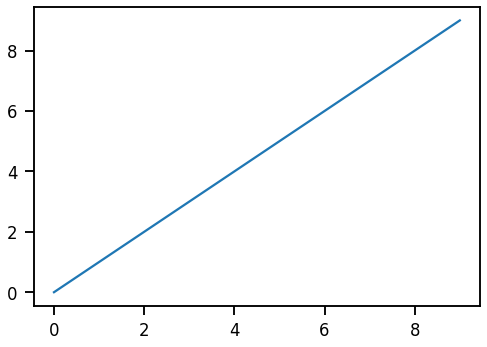

In [77]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook') 
sns.set_context('talk')
plt.plot(range(10))


Plotting with chaining. 
A normal plot is a line plot

<AxesSubplot:xlabel='year'>

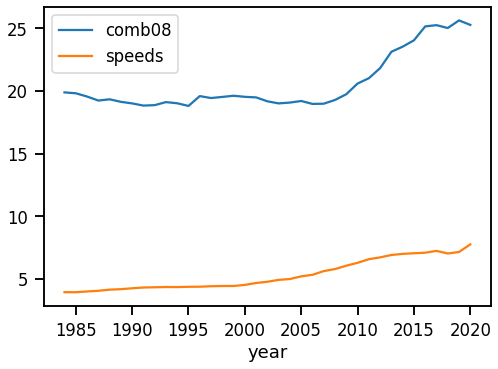

In [78]:

(autos2
   .groupby('year')
   [['comb08', 'speeds']]
   .mean()
   .plot()
)

By commenting one can very quickly figuring things out with the chain method

<AxesSubplot:xlabel='year'>

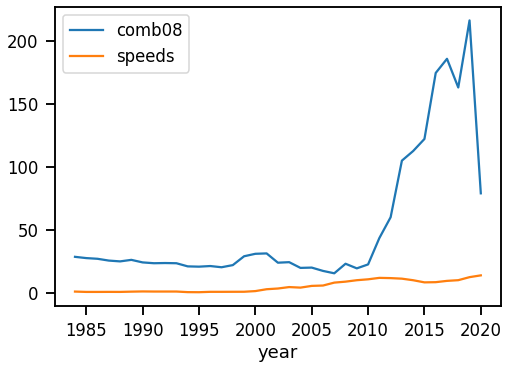

In [79]:
(autos2
   .groupby('year')
   [['comb08', 'speeds']]
   #.mean()
   #.median()
   #.quantile(.3)
   #.std()
   .var()
   .plot()
)

Now we add country to the column

In [80]:
# add country
(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 .mean()
)

city08     comb08  highway08  cylinders     displ  \
year country                                                         
1984 Other    19.384615  21.417330  24.847038   4.908046  2.691406   
     US       16.079232  17.797119  20.669868   6.033613  3.808594   
1985 Other    19.284768  21.373068  24.816777   4.871965  2.636719   
     US       16.275472  18.025157  21.020126   5.949686  3.765625   
1986 Other    19.167183  21.213622  24.650155   4.804954  2.537109   
     US       15.945035  17.645390  20.464539   6.136525  3.925781   
1987 Other    18.633381  20.710414  24.186876   4.825963  2.583984   
     US       15.611722  17.326007  20.208791   6.164835  3.931641   
1988 Other    18.668224  20.814642  24.437695   4.819315  2.531250   
     US       15.577869  17.372951  20.420082   6.307377  4.066406   
...                 ...        ...        ...        ...       ...   
2016 Other    21.903749  24.439716  28.866261   5.493414  2.992188   
     US       25.061818  27.701818  32.265455   5.356364  3.277344   
2017 Other    22.423795  24.910521  29.208456   5.431662  2.919922   
     US       24.003623  26.496377  30.829710   5.532609  3.419922   
2018 Other    22.310442  24.779868  29.042333   5.396990  2.886719   
     US       23.526690  25.925267  30.145907   5.597865  3.390625   
2019 Other    23.084221  25.456922  29.560503   5.315586  2.839844   
     US       24.169014  26.250000  30.042254   5.559859  3.419922   
2020 Other    22.579487  25.174359  29.543590   5.148718  2.693359   
     US       24.071429  26.571429  30.642857   4.000000  1.978516   

               fuelCost08      range    speeds  
year country                                    
1984 Other    2118.125553   0.000000  3.969054  
     US       2578.871549   0.000000  3.872749  
1985 Other    2141.997792   0.000000  3.958057  
     US       2553.899371   0.000000  3.886792  
1986 Other    2149.148607   0.000000  4.069659  
     US       2588.741135   0.000000  3.886525  
1987 Other    2227.318117   0.000000  4.142653  
     US       2630.036630   0.000000  3.902930  
1988 Other    2207.476636   0.000000  4.205607  
     US       2623.258197   0.000000  4.028689  
...                   ...        ...       ...  
2016 Other    2127.608916   1.017224  7.296859  
     US       1960.545455  17.214545  6.301818  
2017 Other    2114.110128   1.243854  7.474926  
     US       2031.884058  15.731884  6.304348  
2018 Other    2121.448730   1.135466  7.391345  
     US       2037.900356  12.537367  5.601423  
2019 Other    2093.659245   2.581801  7.545983  
     US       2093.133803  16.419014  5.647887  
2020 Other    2050.256410   2.446154  7.743590  
     US       1650.000000   0.000000  7.785714  

[74 rows x 8 columns]

A country column will be applied.
now groupby by 2 columns and aggregate by the mean. 

`.unstack()`
Pivot a level of the (necessarily hierarchical) index labels.

Returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.

If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex).

[.unstack doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)

In [81]:
(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 .mean()
 .unstack()
)

city08                comb08             highway08             \
country      Other         US      Other         US      Other         US   
year                                                                        
1984     19.384615  16.079232  21.417330  17.797119  24.847038  20.669868   
1985     19.284768  16.275472  21.373068  18.025157  24.816777  21.020126   
1986     19.167183  15.945035  21.213622  17.645390  24.650155  20.464539   
1987     18.633381  15.611722  20.710414  17.326007  24.186876  20.208791   
1988     18.668224  15.577869  20.814642  17.372951  24.437695  20.420082   
1989     18.533040  15.139831  20.662261  16.908898  24.252570  19.887712   
1990     18.510109  14.850575  20.640747  16.577011  24.267496  19.485057   
1991     18.087943  14.803279  20.174468  16.599532  23.809929  19.683841   
1992     17.915374  14.895631  20.098731  16.735437  23.820874  20.063107   
1993     18.084866  15.007772  20.309760  16.896373  24.172560  20.230570   
1994     18.046474  14.952514  20.264423  16.829609  24.173077  20.201117   
1995     17.678914  14.533724  20.091054  16.422287  24.263578  19.747801   
1996     18.480545  14.926641  20.906615  16.961390  25.093385  20.544402   
1997     18.090909  14.978632  20.509470  16.991453  24.678030  20.683761   
1998     17.925267  15.288000  20.457295  17.408000  24.704626  20.944000   
1999     17.925125  15.709163  20.386023  17.756972  24.577371  21.099602   
2000     17.881849  15.714844  20.301370  17.757812  24.416096  21.128906   
2001     17.941267  15.643939  20.289026  17.496212  24.372488  20.768939   
2002     17.644412  15.083916  20.076923  16.979021  24.207547  20.195804   
2003     17.565101  14.826087  19.953020  16.628763  24.052349  19.806020   
2004     17.426290  14.928571  19.923833  16.805195  24.160934  20.165584   
2005     17.412170  15.196610  19.892078  17.132203  24.189437  20.664407   
2006     17.062575  15.300366  19.509025  17.285714  23.762936  20.875458   
2007     16.996403  15.489726  19.452038  17.626712  23.742206  21.202055   
2008     17.239869  15.770073  19.677985  17.937956  23.983571  21.697080   
2009     17.696803  16.148014  20.186329  18.259928  24.590959  22.140794   
2010     18.325342  17.278970  20.851598  19.600858  25.256849  23.785408   
2011     19.247387  16.817844  21.635308  19.014870  25.855981  22.973978   
2012     19.838052  17.802974  22.339751  20.111524  26.695357  24.167286   
2013     20.982888  19.453815  23.471658  21.823293  27.860963  26.164659   
2014     21.159919  20.506329  23.655870  23.012658  28.088057  27.523207   
2015     21.350000  21.817490  23.935294  24.441065  28.481373  28.996198   
2016     21.903749  25.061818  24.439716  27.701818  28.866261  32.265455   
2017     22.423795  24.003623  24.910521  26.496377  29.208456  30.829710   
2018     22.310442  23.526690  24.779868  25.925267  29.042333  30.145907   
2019     23.084221  24.169014  25.456922  26.250000  29.560503  30.042254   
2020     22.579487  24.071429  25.174359  26.571429  29.543590  30.642857   

        cylinders               displ             fuelCost08               \
country     Other        US     Other        US        Other           US   
year                                                                        
1984     4.908046  6.033613  2.691406  3.808594  2118.125553  2578.871549   
1985     4.871965  5.949686  2.636719  3.765625  2141.997792  2553.899371   
1986     4.804954  6.136525  2.537109  3.925781  2149.148607  2588.741135   
1987     4.825963  6.164835  2.583984  3.931641  2227.318117  2630.036630   
1988     4.819315  6.307377  2.531250  4.066406  2207.476636  2623.258197   
1989     4.879589  6.366525  2.542969  4.171875  2250.000000  2698.093220   
1990     4.839813  6.466667  2.507812  4.265625  2238.258165  2728.735632   
1991     5.029787  6.538642  2.609375  4.351562  2348.581560  2725.761124   
1992     5.145275  6.446602  2.708984  4.250000  2373.272214  2703.762136   
1993   

Now lets add more than one aggregation with the .agg function by adding a list of functions, which can be also defined (here the secont_to_last value with .iloc[-2])

In [82]:
# can go deeper and apply multiple aggregates
def second_to_last(ser):
    return ser.iloc[-2]

(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 .agg(['min', 'mean', second_to_last])
)


/var/folders/ct/z827xx412hg8j9fj85f2vxfm0000gn/T/ipykernel_34946/498935601.py:5: FutureWarning: ['drive', 'make', 'model'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  (autos2


city08                           comb08             \
                min       mean second_to_last    min       mean   
year country                                                      
1984 Other        7  19.384615             14      8  21.417330   
     US           8  16.079232             15      9  17.797119   
1985 Other        7  19.284768             19      8  21.373068   
     US           8  16.275472             14     10  18.025157   
1986 Other        6  19.167183             10      7  21.213622   
     US           9  15.945035             16     10  17.645390   
1987 Other        6  18.633381             12      7  20.710414   
     US           8  15.611722             12      9  17.326007   
1988 Other        6  18.668224             12      7  20.814642   
     US           8  15.577869             14      9  17.372951   
...             ...        ...            ...    ...        ...   
2016 Other       10  21.903749             28     12  24.439716   
     US          11  25.061818             91     12  27.701818   
2017 Other       10  22.423795             21     11  24.910521   
     US          11  24.003623            131     12  26.496377   
2018 Other        9  22.310442             11     11  24.779868   
     US          11  23.526690            120     14  25.925267   
2019 Other        9  23.084221             19     11  25.456922   
     US          11  24.169014            104     14  26.250000   
2020 Other       13  22.579487             17     15  25.174359   
     US          20  24.071429             21     22  26.571429   

                            highway08                           cylinders  \
             second_to_last       min       mean second_to_last       min   
year country                                                                
1984 Other               14         9  24.847038             15         2   
     US                  17        10  20.669868             19         4   
1985 Other               20         9  24.816777             22         0   
     US                  15        10  21.020126             17         3   
1986 Other               11         9  24.650155             12         0   
     US                  17        11  20.464539             19         3   
1987 Other               12         9  24.186876             12         2   
     US                  13        10  20.208791             14         3   
1988 Other               12        10  24.437695             12         2   
     US                  14        10  20.420082             15         3   
...                     ...       ...        ...            ...       ...   
2016 Other               30        13  28.866261             32         0   
     US                  93        16  32.265455             94         0   
2017 Other               24        11  29.208456             28         0   
     US                 126        15  30.829710            120         0   
2018 Other               12        11  29.042333             15         0   
     US                 116        15  30.145907            112         0   
2019 Other               22        14  29.560503             27         0   
     US                 104        15  30.042254            104         0   
2020 Other               20        18  29.543590             24         0   
     US                  24        26  30.642857             28         4   

              ...                 createdOn automatic            \
              ...            second_to_last       min      mean   
year country  ...                                                 
1984 Other    ... 2013-01-01 00:00:00-05:00     False  0.550840   
     US       ... 2013-01-01 00:00:00-05:00     False  0.521059   
1985 Other    ... 2013-01-01 00:00:00-05:00     False  0.554084   
     US       ... 2013-01-01 00:00:00-05:00     False  0.520755   
1986 Other    ... 2013-01-01 00:00:00-05:00     False  0.520124   
     US       ... 2

Again some plotting :)

<AxesSubplot:xlabel='year,country'>

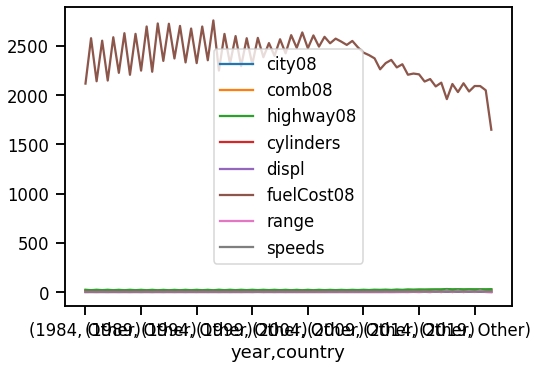

In [83]:
# back to simpler example, adding plots
(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 .mean()
 .plot()
)


In [84]:

(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 .mean()
 .unstack()
)


city08                comb08             highway08             \
country      Other         US      Other         US      Other         US   
year                                                                        
1984     19.384615  16.079232  21.417330  17.797119  24.847038  20.669868   
1985     19.284768  16.275472  21.373068  18.025157  24.816777  21.020126   
1986     19.167183  15.945035  21.213622  17.645390  24.650155  20.464539   
1987     18.633381  15.611722  20.710414  17.326007  24.186876  20.208791   
1988     18.668224  15.577869  20.814642  17.372951  24.437695  20.420082   
1989     18.533040  15.139831  20.662261  16.908898  24.252570  19.887712   
1990     18.510109  14.850575  20.640747  16.577011  24.267496  19.485057   
1991     18.087943  14.803279  20.174468  16.599532  23.809929  19.683841   
1992     17.915374  14.895631  20.098731  16.735437  23.820874  20.063107   
1993     18.084866  15.007772  20.309760  16.896373  24.172560  20.230570   
1994     18.046474  14.952514  20.264423  16.829609  24.173077  20.201117   
1995     17.678914  14.533724  20.091054  16.422287  24.263578  19.747801   
1996     18.480545  14.926641  20.906615  16.961390  25.093385  20.544402   
1997     18.090909  14.978632  20.509470  16.991453  24.678030  20.683761   
1998     17.925267  15.288000  20.457295  17.408000  24.704626  20.944000   
1999     17.925125  15.709163  20.386023  17.756972  24.577371  21.099602   
2000     17.881849  15.714844  20.301370  17.757812  24.416096  21.128906   
2001     17.941267  15.643939  20.289026  17.496212  24.372488  20.768939   
2002     17.644412  15.083916  20.076923  16.979021  24.207547  20.195804   
2003     17.565101  14.826087  19.953020  16.628763  24.052349  19.806020   
2004     17.426290  14.928571  19.923833  16.805195  24.160934  20.165584   
2005     17.412170  15.196610  19.892078  17.132203  24.189437  20.664407   
2006     17.062575  15.300366  19.509025  17.285714  23.762936  20.875458   
2007     16.996403  15.489726  19.452038  17.626712  23.742206  21.202055   
2008     17.239869  15.770073  19.677985  17.937956  23.983571  21.697080   
2009     17.696803  16.148014  20.186329  18.259928  24.590959  22.140794   
2010     18.325342  17.278970  20.851598  19.600858  25.256849  23.785408   
2011     19.247387  16.817844  21.635308  19.014870  25.855981  22.973978   
2012     19.838052  17.802974  22.339751  20.111524  26.695357  24.167286   
2013     20.982888  19.453815  23.471658  21.823293  27.860963  26.164659   
2014     21.159919  20.506329  23.655870  23.012658  28.088057  27.523207   
2015     21.350000  21.817490  23.935294  24.441065  28.481373  28.996198   
2016     21.903749  25.061818  24.439716  27.701818  28.866261  32.265455   
2017     22.423795  24.003623  24.910521  26.496377  29.208456  30.829710   
2018     22.310442  23.526690  24.779868  25.925267  29.042333  30.145907   
2019     23.084221  24.169014  25.456922  26.250000  29.560503  30.042254   
2020     22.579487  24.071429  25.174359  26.571429  29.543590  30.642857   

        cylinders               displ             fuelCost08               \
country     Other        US     Other        US        Other           US   
year                                                                        
1984     4.908046  6.033613  2.691406  3.808594  2118.125553  2578.871549   
1985     4.871965  5.949686  2.636719  3.765625  2141.997792  2553.899371   
1986     4.804954  6.136525  2.537109  3.925781  2149.148607  2588.741135   
1987     4.825963  6.164835  2.583984  3.931641  2227.318117  2630.036630   
1988     4.819315  6.307377  2.531250  4.066406  2207.476636  2623.258197   
1989     4.879589  6.366525  2.542969  4.171875  2250.000000  2698.093220   
1990     4.839813  6.466667  2.507812  4.265625  2238.258165  2728.735632   
1991     5.029787  6.538642  2.609375  4.351562  2348.581560  2725.761124   
1992     5.145275  6.446602  2.708984  4.250000  2373.272214  2703.762136   
1993   

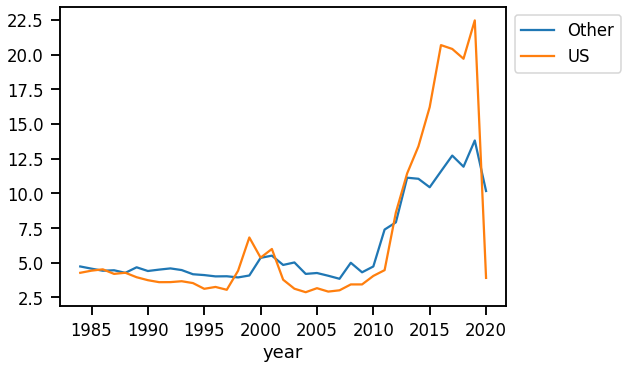

In [85]:

(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 #.mean()
 .std()
 .unstack()
 .city08
 .plot()
 .legend(bbox_to_anchor=(1,1))
)



Adding the `rolling function`

`.rolling()` Provide rolling window calculations.

[.rolling() doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html?highlight=rolling#pandas.DataFrame.rolling)

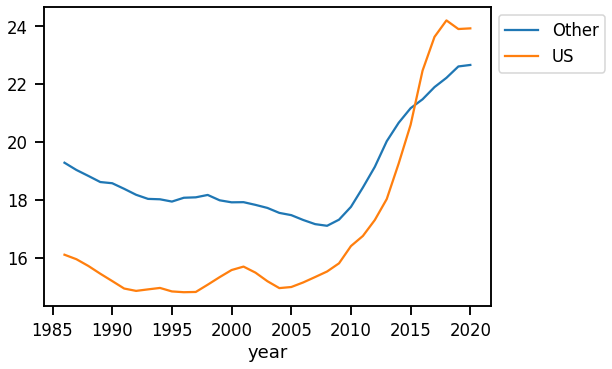

In [86]:


# smoothe it out a bit w/ rolling
(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 .mean()
 .unstack()
 .city08
 .rolling(3)
 .mean()
 .plot()
 .legend(bbox_to_anchor=(1,1))
)



For filtering your data, on could use `.gt` = greater than

Get Greater than of dataframe and other, element-wise (binary operator gt).

Among flexible wrappers (eq, ne, le, lt, ge, gt) to comparison operators.

Equivalent to ==, !=, <=, <, >=, > with support to choose axis (rows or columns) and level for comparison.

[more in the doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.gt.html?highlight=gt#pandas.DataFrame.gt)

In [87]:
def vals_gt(df_,num):
    return df_[df_.gt(num)].dropna()

(autos2
.assign(country=autos2.make.apply(country))
.groupby(["year","country"])
.count()
.pipe(vals_gt, 700)
)

,,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,automatic,speeds,ffs
year,country,,,,,,,,,,,,,,
1984,Other,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1065.0
1985,Other,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0,821.0
1991,Other,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0
1992,Other,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,707.0
1993,Other,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0,707.0
2017,Other,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,766.0
2018,Other,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,844.0
2019,Other,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,855.0


### Summary

Correct types save space and enable convenient math, string, and date functionality

Chaining operations will:
*  Make code readable
*  Remove bugs
*  Easier to debug

Don't mutate (there's no point). Embrace chaining.

'.apply' is slow for math

Aggregations are powerful. Play with them until they make sense
